In [23]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_p_young_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [24]:
data

['t_n103        39.5335 (33.5217, 45.2183) (33.5800, 45.2716) 11.6916 (Jnode 202)\n',
 't_n104        33.5789 (26.6409, 41.0530) (26.6081, 41.0137) 14.4056 (Jnode 201)\n',
 't_n105        32.2981 (25.6008, 39.5366) (25.4636, 39.3832) 13.9196 (Jnode 200)\n',
 't_n106        29.0098 (22.9272, 35.6409) (22.8318, 35.5300) 12.6982 (Jnode 199)\n',
 't_n107        28.0482 (22.1553, 34.4838) (22.0075, 34.3274) 12.3199 (Jnode 198)\n',
 't_n108        26.1271 (20.5917, 32.1983) (20.5005, 32.0773) 11.5768 (Jnode 197)\n',
 't_n109        14.8441 (11.2609, 18.9526) (11.1028, 18.7667)  7.6638 (Jnode 196)\n',
 't_n110        14.6815 (11.1323, 18.7530) (10.9224, 18.5119)  7.5895 (Jnode 195)\n',
 't_n111        14.2246 (10.7764, 18.1860) (10.6292, 17.9982)  7.3690 (Jnode 194)\n',
 't_n112        13.6146 (10.3066, 17.4253) (10.1539, 17.2344)  7.0805 (Jnode 193)\n',
 't_n113        13.0335 ( 9.8526, 16.7002) ( 9.7069, 16.5220)  6.8151 (Jnode 192)\n',
 't_n114         9.4544 ( 6.9302, 12.4912) ( 6.7564, 1

In [25]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [26]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [27]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [28]:
posterior_mean_iqtree

[39.5335,
 33.5789,
 32.2981,
 29.0098,
 28.0482,
 26.1271,
 14.8441,
 14.6815,
 14.2246,
 13.6146,
 13.0335,
 9.4544,
 2.9266,
 7.0145,
 5.6317,
 10.2917,
 8.5101,
 13.5346,
 12.945,
 7.5662,
 10.3158,
 8.5867,
 7.4308,
 12.8095,
 11.8837,
 3.5984,
 14.0368,
 12.5943,
 9.1832,
 8.4098,
 7.0601,
 9.9603,
 7.9433,
 7.0692,
 24.8194,
 19.5943,
 26.5695,
 24.0439,
 21.9547,
 17.4663,
 15.0256,
 13.2879,
 10.9834,
 18.1665,
 9.9349,
 22.0419,
 20.1551,
 5.8038,
 2.6531,
 29.8916,
 26.2645,
 21.6299,
 16.4788,
 18.0413,
 27.7883,
 24.047,
 24.6052,
 32.4779,
 30.3237,
 26.8076,
 9.9244,
 27.2344,
 25.4189,
 21.5867,
 18.8841,
 14.8363,
 26.9958,
 19.9767,
 18.9998,
 18.2739,
 17.2379,
 15.5417,
 14.8926,
 14.1568,
 13.3024,
 12.2026,
 11.0944,
 9.6196,
 6.7535,
 12.2931,
 10.8732,
 9.5252,
 13.3868,
 12.018,
 11.3036,
 8.972,
 9.9184,
 11.7953,
 10.2087,
 8.4523,
 14.6651,
 12.7202,
 13.8445,
 12.8774,
 11.3071,
 8.1223,
 9.3807,
 7.5218,
 2.7355,
 19.4787,
 16.3392]

In [29]:
lower_ci_iqtree

[]

In [30]:
upper_ci_iqtree

[]

In [31]:
file_LG = open("LG_G4_PM_codeml_young_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [33]:
posterior_mean_baseml

[36.9792,
 28.1045,
 26.9663,
 24.8798,
 24.1955,
 23.0641,
 12.4098,
 12.337,
 12.0481,
 11.4985,
 11.0286,
 8.4351,
 2.1084,
 5.9317,
 4.2088,
 8.3708,
 7.2591,
 11.4537,
 11.0048,
 5.7771,
 8.6668,
 7.1389,
 6.7682,
 10.7213,
 10.0049,
 3.1769,
 11.6231,
 10.5561,
 7.1673,
 6.4051,
 5.0754,
 8.464,
 6.7556,
 4.2558,
 21.5423,
 18.5486,
 22.9287,
 21.0234,
 19.4802,
 16.1236,
 13.9342,
 12.3882,
 10.3819,
 16.4365,
 9.8693,
 19.5777,
 17.7625,
 4.8269,
 2.1497,
 24.8678,
 22.1571,
 18.9319,
 15.0934,
 15.7183,
 23.3899,
 20.717,
 21.2706,
 27.2311,
 25.5576,
 22.4722,
 10.0701,
 23.1143,
 21.4578,
 18.866,
 16.3865,
 14.4706,
 23.2999,
 16.4416,
 15.6471,
 15.1027,
 14.7735,
 13.4132,
 12.8288,
 12.3873,
 11.6469,
 10.7834,
 9.8888,
 8.6019,
 6.2795,
 10.6835,
 9.8045,
 8.8709,
 11.8545,
 10.6712,
 9.9764,
 8.1971,
 8.9856,
 10.5351,
 9.2613,
 7.6572,
 12.7027,
 11.1419,
 12.0383,
 11.0693,
 9.8564,
 7.2562,
 7.4927,
 4.6727,
 1.7097,
 15.4857,
 13.5294]

In [34]:
posterior_mean_iqtree

[39.5335,
 33.5789,
 32.2981,
 29.0098,
 28.0482,
 26.1271,
 14.8441,
 14.6815,
 14.2246,
 13.6146,
 13.0335,
 9.4544,
 2.9266,
 7.0145,
 5.6317,
 10.2917,
 8.5101,
 13.5346,
 12.945,
 7.5662,
 10.3158,
 8.5867,
 7.4308,
 12.8095,
 11.8837,
 3.5984,
 14.0368,
 12.5943,
 9.1832,
 8.4098,
 7.0601,
 9.9603,
 7.9433,
 7.0692,
 24.8194,
 19.5943,
 26.5695,
 24.0439,
 21.9547,
 17.4663,
 15.0256,
 13.2879,
 10.9834,
 18.1665,
 9.9349,
 22.0419,
 20.1551,
 5.8038,
 2.6531,
 29.8916,
 26.2645,
 21.6299,
 16.4788,
 18.0413,
 27.7883,
 24.047,
 24.6052,
 32.4779,
 30.3237,
 26.8076,
 9.9244,
 27.2344,
 25.4189,
 21.5867,
 18.8841,
 14.8363,
 26.9958,
 19.9767,
 18.9998,
 18.2739,
 17.2379,
 15.5417,
 14.8926,
 14.1568,
 13.3024,
 12.2026,
 11.0944,
 9.6196,
 6.7535,
 12.2931,
 10.8732,
 9.5252,
 13.3868,
 12.018,
 11.3036,
 8.972,
 9.9184,
 11.7953,
 10.2087,
 8.4523,
 14.6651,
 12.7202,
 13.8445,
 12.8774,
 11.3071,
 8.1223,
 9.3807,
 7.5218,
 2.7355,
 19.4787,
 16.3392]

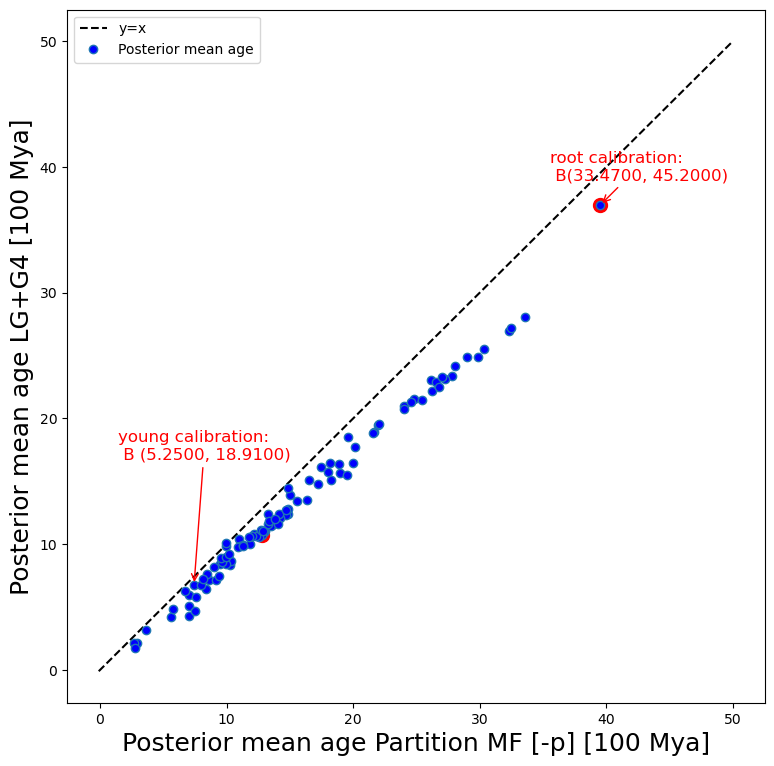

In [35]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

# points[0].set_edgecolor('red')  # Change edge color if needed
points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[23], posterior_mean_baseml[23], color='red', s=100)
ax.annotate('root calibration:\n B(33.4700, 45.2000)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0] -4,  posterior_mean_baseml[0] + 2),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('young calibration:\n B (5.2500, 18.9100)', 
        xy=(posterior_mean_iqtree[22], posterior_mean_baseml[22]), 
        xytext=(posterior_mean_iqtree[22] -6,  posterior_mean_baseml[22] + 10),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
 
# Labels and title
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age Partition MF [-p] [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t121 ~ B(5.2500,18.9100)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_p_cherry_scatter.png')

In [36]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')